# Read a LVIS file 

In [1]:
from os import path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import s3fs

In [2]:
s3 = s3fs.S3FileSystem(anon=False)
lvis = s3.ls('bioscape-data/LVIS')
lvis

['bioscape-data/LVIS/L1B', 'bioscape-data/LVIS/L2']

In [3]:
lvis_l2 = s3.ls(lvis[1])
# print first few files
lvis_l2[:10]

['bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_027373.TXT',
 'bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_027526.TXT',
 'bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_027815.TXT',
 'bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_027902.TXT',
 'bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_027990.TXT',
 'bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_028077.TXT',
 'bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_028551.TXT',
 'bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_028761.TXT',
 'bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_028852.TXT',
 'bioscape-data/LVIS/L2/LVISF2_BioSCape2023_1020_R2404_028939.TXT']

In [4]:
def get_line_number(filename):
    """find number of header rows in LVIS L2A"""
    count = 0
    with s3.open(filename, 'rb') as f:
        for line in f:
            if line.startswith(b'#'):
                count = count + 1
                columns = line[1:].split()
            else:
                return count, columns

In [5]:
# read the LVIS L2A files
lvis_f = path.join('s3://', lvis_l2[1])
h_no, col_names = get_line_number(lvis_f)
lvis_l2a_df = pd.read_csv(lvis_f, skiprows=h_no, header=None, engine='python', sep=r'\s+')
lvis_l2a_df.columns =  [x.decode() for x in col_names]

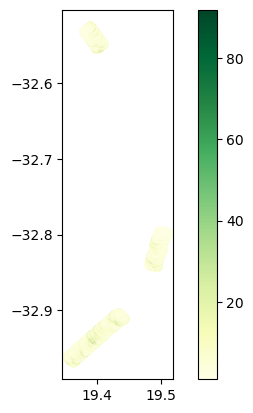

In [6]:
# plot RH100
lvis_l2a_gdf = gpd.GeoDataFrame(
    lvis_l2a_df, geometry=gpd.points_from_xy(lvis_l2a_df.GLON, lvis_l2a_df.GLAT), 
    crs="EPSG:4326")
lvis_l2a_gdf.plot(column="RH100", legend=True, alpha=0.5, cmap='YlGn')
plt.show()